In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 6.8 MB/s eta 0:00:00


Thời gian giặt đề xuất (phút): 53.0
Mực nước đề xuất (0..10):      8.6


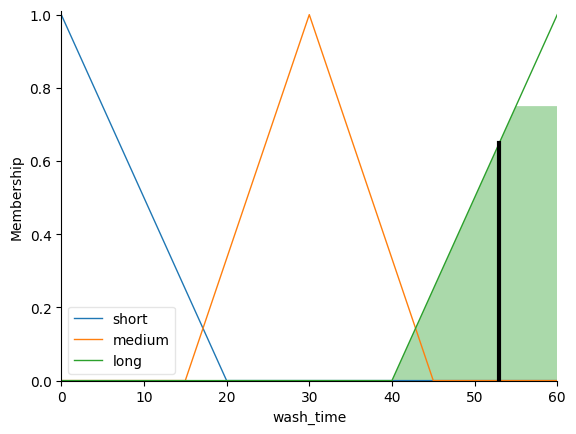

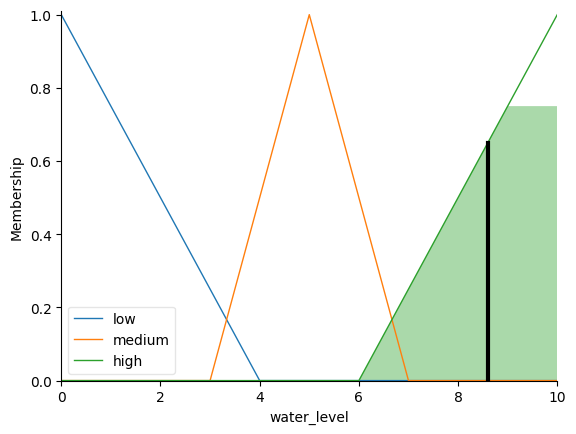

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

load_size    = ctrl.Antecedent(np.arange(0, 11, 1), 'load_size')
dirt_level   = ctrl.Antecedent(np.arange(0, 11, 1), 'dirt_level')
fabric_type  = ctrl.Antecedent(np.arange(0, 11, 1), 'fabric_type')

wash_time    = ctrl.Consequent(np.arange(0, 61, 1), 'wash_time')
water_level  = ctrl.Consequent(np.arange(0, 11, 1), 'water_level')

load_size['small']  = fuzz.trimf(load_size.universe, [0, 0, 4])
load_size['medium'] = fuzz.trimf(load_size.universe, [3, 5, 7])
load_size['large']  = fuzz.trimf(load_size.universe, [6, 10, 10])

dirt_level['low']    = fuzz.trimf(dirt_level.universe, [0, 0, 4])
dirt_level['medium'] = fuzz.trimf(dirt_level.universe, [3, 5, 7])
dirt_level['high']   = fuzz.trimf(dirt_level.universe, [6, 10, 10])

fabric_type['delicate'] = fuzz.trimf(fabric_type.universe, [0, 0, 4])
fabric_type['normal']   = fuzz.trimf(fabric_type.universe, [3, 5, 7])
fabric_type['heavy']    = fuzz.trimf(fabric_type.universe, [6, 10, 10])

wash_time['short']  = fuzz.trimf(wash_time.universe, [0, 0, 20])
wash_time['medium'] = fuzz.trimf(wash_time.universe, [15, 30, 45])
wash_time['long']   = fuzz.trimf(wash_time.universe, [40, 60, 60])

water_level['low']    = fuzz.trimf(water_level.universe, [0, 0, 4])
water_level['medium'] = fuzz.trimf(water_level.universe, [3, 5, 7])
water_level['high']   = fuzz.trimf(water_level.universe, [6, 10, 10])

rule1 = ctrl.Rule(load_size['small'] & dirt_level['low'],
                  (wash_time['short'], water_level['low']))
rule2 = ctrl.Rule(load_size['small'] & dirt_level['medium'],
                  (wash_time['medium'], water_level['medium']))
rule3 = ctrl.Rule(load_size['small'] & dirt_level['high'],
                  (wash_time['long'], water_level['medium']))

rule4 = ctrl.Rule(load_size['medium'] & dirt_level['low'],
                  (wash_time['medium'], water_level['medium']))
rule5 = ctrl.Rule(load_size['medium'] & dirt_level['high'],
                  (wash_time['long'], water_level['high']))

rule6 = ctrl.Rule(load_size['large'] & dirt_level['low'],
                  (wash_time['medium'], water_level['high']))
rule7 = ctrl.Rule(load_size['large'] & dirt_level['medium'],
                  (wash_time['long'], water_level['high']))
rule8 = ctrl.Rule(load_size['large'] & dirt_level['high'],
                  (wash_time['long'], water_level['high']))

rule9  = ctrl.Rule(fabric_type['delicate'], (wash_time['short'], water_level['low']))
rule10 = ctrl.Rule(fabric_type['heavy'],    (wash_time['long'], water_level['high']))

rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10]

washing_ctrl = ctrl.ControlSystem(rules)
washing_sim  = ctrl.ControlSystemSimulation(washing_ctrl)

washing_sim.input['load_size']   = 8
washing_sim.input['dirt_level']  = 9
washing_sim.input['fabric_type'] = 9

washing_sim.compute()

print("Thời gian giặt đề xuất (phút):", washing_sim.output['wash_time'])
print("Mực nước đề xuất (0..10):     ", washing_sim.output['water_level'])

wash_time.view(sim=washing_sim)
water_level.view(sim=washing_sim)
